## Module_2: *(Template)*

## Team Members:
*Utsav Dhungana & Sheza Khan*

## Project Title:
Fibrosis Image Analysis Pipeline



## Project Goal:
This project seeks to create a program that analyzes the extent of fibrosis of the lung at different biopsy depths based on the images provided.

## Disease Background: 
*Fill in information and please note that this module is truncated and only has 5 bullets (instead of the 11 that you did for Module #1).*

* Prevalence & incidence: [source](https://pro.boehringer-ingelheim.com/us/insights-in-ild/diseases/epidemiology-ipf)
    * 140,000 people in the U.S. are currently living with Idiopathic Lung Fibrosis (IPF)
    * Approximately 50,000 new cases are diagnosed every year
    * 60-80% of diagnosed patients will die within 5 years
        * In fact IPF has a worse 5 year survival rate than many common cancers (Breast cancer and Colorectal cancer)
    * The criteria for diagnosis varies in different areas so it is hard to guage the exact global prevalence of IPF
    * Incidence seems to be increasing globally:
        * Due to technology being able to diagnose cases that were hidden earlier
        * Aging populations
        * Diagnostic Imaging
* Risk factors (genetic, lifestyle): [source](https://pro.boehringer-ingelheim.com/us/insights-in-ild/diseases/epidemiology-ipf)
    * Common risk factors include being male, 65+, or with a history of smoking
        * Typically found in patients 60-70 and rarely found in patients under 50 years old
        * Prevalance of IPF is 20% higher in males than in females
        * There is a strong correlation between cases and smoking history, even exposure to tobacco smoke is a risk
        * Environmental exposures can also play a role
            * Wood dust
            * Metal dust
            * Silica
            * Agricultural Exposure
        * Mutation in the MUC5B promoter region
    * It is also estimated that 5% of IPF cases are hertiable
        * A family history of IPF increases the risk of getting IPF by 6 times as much
* Symptoms: [source](https://www.mayoclinic.org/diseases-conditions/pulmonary-fibrosis/symptoms-causes/syc-20353690)
    * Shortness of breath and Dry Cough
    * Extreme tiredness and unintentional weightloss
    * Widening or rounding at the tip of the fingers and toes (clubbing)
    * Aching muscles and joints
    * Chest discomfort/tightness
    * Symptoms typically progress slowly, but can speed up suddenly and become worse
* Standard of care treatment(s): [source](https://www.nhs.uk/conditions/idiopathic-pulmonary-fibrosis/treatment/)
    * Pirfenidone and Ofev(Nintedanib) are 2 drugs that have show to be successful in slowing down the progression of ipf
        * Both drugs have many side effects: liver damgage, stomach pain, and diarrhea
    * Oxygen support
        * Issues in the lungs will cause a lack of oxygen in the blood so using portable oxygen can be helpful in helping patients be active
    * Pulmonary Rehabilitation
        * Helps patients learn to live with their condition on a daily basis
        * Exercises during rehab can include breating exercises, physical activity, and advice on nutrition
    * Lung transplant
        * The only definitive treatment to the end stage of IPF
        * Only a few patients qualify due to other illnesses and age
* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology): [source](https://pmc.ncbi.nlm.nih.gov/articles/PMC8142468/)
    * The Diseased lung has cell types/properties that the healthy lung does not
        * "Notable examples of this include a Secreted Phosphoprotein 1 (osteopontin) expressing interstitial macrophage population"
        * "Collagen type 15, α−1 expressing peribronchiolar endothelial cell population"
        * "Highly-activated fibroblast population characterized by high expression of hyaluronan-synthase-1"
        * "Basal-like-cell population expressing a combination of basal cell, alveolar, and mesenchymal programs"

## Data-Set: 
* The data collected consists of 78 black and white images collected at a variety of depths of a fibrotic mouse lung
* Mice were chosen as a subject of testing because of the similarities that they share with humans in terms of lung and alveloi anatomy
* Experiments starts with Mice being injected with Bleomycin, a cancer treatment that can cause fibrosis. Using this side effect as an advantage, Bleomycin is injected and then the mice are left alone for 3 weeks
    * After the 3 week period the lung of the mice is cut transversally to capture images at different depths
* The image is captured by using a piece of the lung from different depths and adding immunostain to the slices to highlight three proteins of interest:
    * Myofibroblasts (cells that make fibrotic scar tissue)
    * Smooth Muscle Alpha Actin (Large blood vessel smooth muscle)
    * CD-31 (Endothelial cells in all blood vessels)
* The Myofibroblasts are the main cells that make the scar and is what is going to be looked at the most

## Data Analyis: 
*(Describe how you analyzed the data. This is where you should intersperse your Python code so that anyone reading this can run your code to perform the analysis that you did, generate your figures, etc.)*

Counts of pixel by color in each image
White pixels in image 0: 27561
Black pixels in image 0: 4166743

White pixels in image 1: 33746
Black pixels in image 1: 4160558

White pixels in image 2: 31331
Black pixels in image 2: 4162973

White pixels in image 3: 23900
Black pixels in image 3: 4170404

White pixels in image 4: 33151
Black pixels in image 4: 4161153

White pixels in image 5: 59426
Black pixels in image 5: 4134878

Percent white px:
/Users/Sheza/Desktop/2025-26/BME 2315/MASK_Sk658 Llobe ch010017.jpg:
0.6571054458618164% White | Depth: 45 microns

/Users/Sheza/Desktop/2025-26/BME 2315/MASK_Sk658 Llobe ch010018.jpg:
0.8045673370361328% White | Depth: 90 microns

/Users/Sheza/Desktop/2025-26/BME 2315/MASK_Sk658 Llobe ch010019.jpg:
0.7469892501831055% White | Depth: 60 microns

/Users/Sheza/Desktop/2025-26/BME 2315/MASK_Sk658 Llobe ch010021.jpg:
0.5698204040527344% White | Depth: 30 microns

/Users/Sheza/Desktop/2025-26/BME 2315/MASK_Sk658 Llobe ch010022.jpg:
0.7903814315795898% 

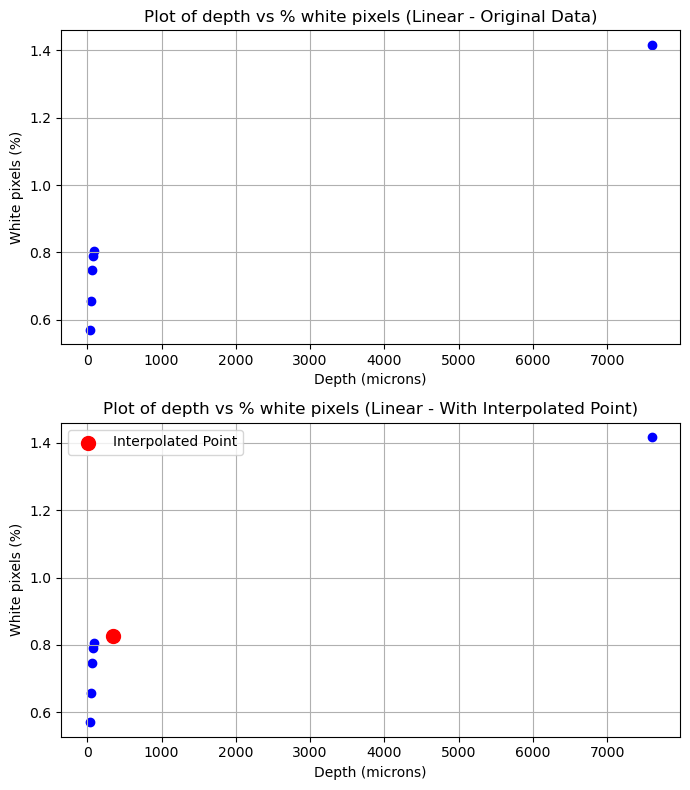

[QUADRATIC] Interpolated point: x = 350, y = 1.1609587875056666


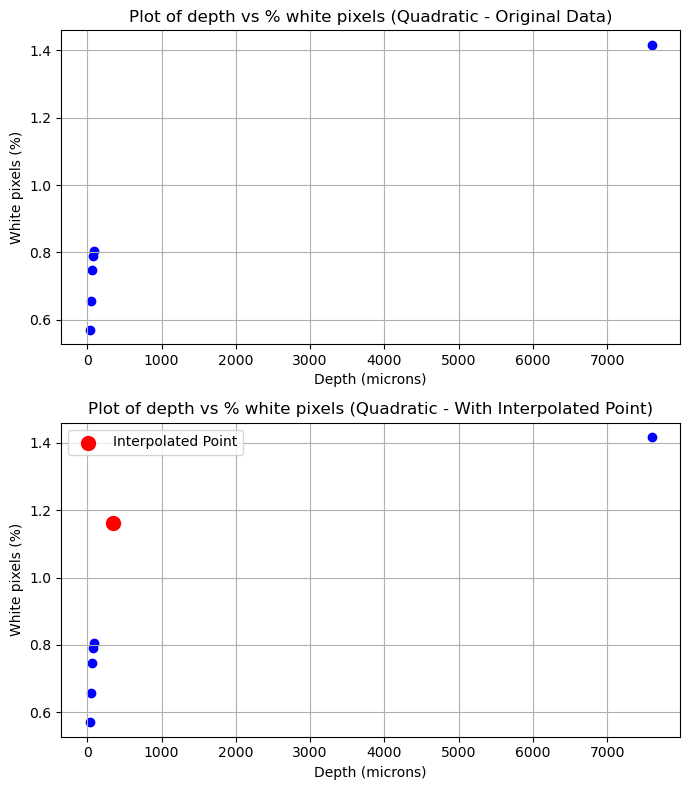

[CUBIC] Interpolated point: x = 350, y = 2.275748731631


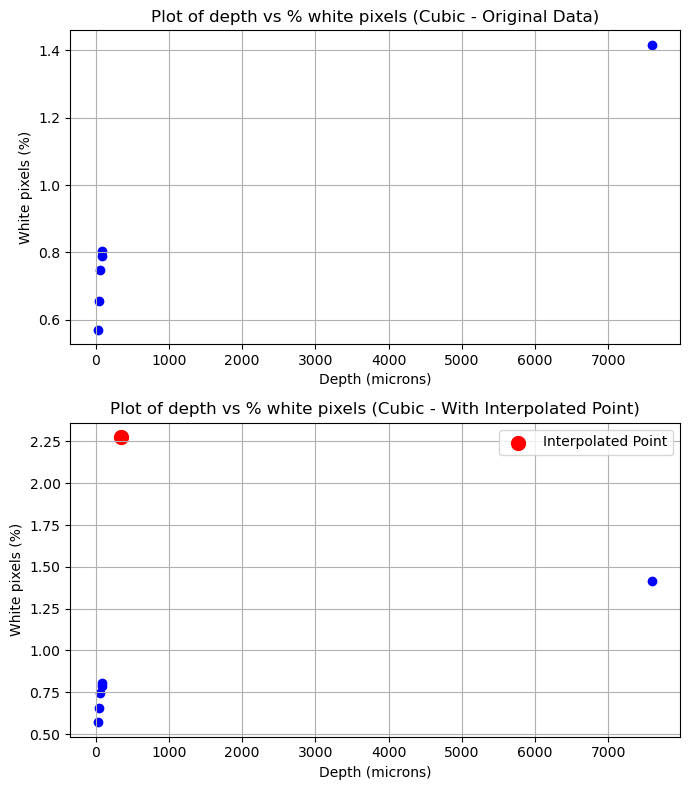

In [13]:
from termcolor import colored
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

# Load the images you want to analyze

filenames = [
    r"/Users/Sheza/Desktop/2025-26/BME 2315/MASK_Sk658 Llobe ch010017.jpg",
    r"/Users/Sheza/Desktop/2025-26/BME 2315/MASK_Sk658 Llobe ch010018.jpg",
    r"/Users/Sheza/Desktop/2025-26/BME 2315/MASK_Sk658 Llobe ch010019.jpg",
    r"/Users/Sheza/Desktop/2025-26/BME 2315/MASK_Sk658 Llobe ch010021.jpg",
    r"/Users/Sheza/Desktop/2025-26/BME 2315/MASK_Sk658 Llobe ch010022.jpg",
    r"/Users/Sheza/Desktop/2025-26/BME 2315/MASK_Sk658 Slobe ch010159.jpg",
            ]

# Enter the depth of each image (in the same order that the images are listed above)

depths = [
    45,
    90,
    60,
    30,
    80,
    7600
    ]

# Make the lists that will be used

images = []
white_counts = []
black_counts = []
white_percents = []

# Build the list of all the images you are analyzing

for filename in filenames:
    img = cv2.imread(filename, 0)
    images.append(img)

# For each image (until the end of the list of images), calculate the number of black and white pixels and make a list that contains this information for each filename.

for x in range(len(filenames)):
    _, binary = cv2.threshold(images[x], 127, 255, cv2.THRESH_BINARY)

    white = np.sum(binary == 255)
    black = np.sum(binary == 0)

    white_counts.append(white)
    black_counts.append(black)

# Print the number of white and black pixels in each image.

print(colored("Counts of pixel by color in each image", "yellow"))
for x in range(len(filenames)):
    print(colored(f"White pixels in image {x}: {white_counts[x]}", "white"))
    print(colored(f"Black pixels in image {x}: {black_counts[x]}", "black"))
    print()

# Calculate the percentage of pixels in each image that are white and make a list that contains these percentages for each filenamae

for x in range(len(filenames)):
    white_percent = (100 * (white_counts[x] / (black_counts[x] + white_counts[x])))
    white_percents.append(white_percent)

# Print the filename (on one line in red font), and below that line print the percent white pixels and depth

print(colored("Percent white px:", "yellow"))
for x in range(len(filenames)):
    print(colored(f'{filenames[x]}:',"red"))
    print(f'{white_percents[x]}% White | Depth: {depths[x]} microns')
    print()


# Create a DataFrame that includes the filenames, depths, and percentage of white pixels
df = pd.DataFrame({
    'Filenames': filenames,
    'Depths': depths,
    'White percents': white_percents       
})

# Write that DataFrame to a .csv file

df.to_csv('White_Pixel_Percentages.csv', index=False)

print("CSV file 'White_Pixel_Percentages.csv' has been created.")
'''the .csv writing subroutine ends here'''

# Interpolate a point: given a depth, find the corresponding white pixel percentage and plot it on a graph

interpolate_depth = 350  # depth not accounted for in images

x = depths
y = white_percents

# Sort depths and percents to avoid interpolation errors
x, y = zip(*sorted(zip(x, y)))
x = np.array(x)
y = np.array(y)

# Interpolation types to visualize
interpolation_types = ['linear', 'quadratic', 'cubic']

for interp_type in interpolation_types:
    i = interp1d(x, y, kind=interp_type)
    interpolate_point = float(i(interpolate_depth))

    print(colored(f'[{interp_type.upper()}] Interpolated point: '
                  f'x = {interpolate_depth}, y = {interpolate_point}', "green"))

    # Add interpolated point to plotting lists
    depths_i = list(x) + [interpolate_depth]
    white_percents_i = list(y) + [interpolate_point]

    # Create the two subplots just like the original
    fig, axs = plt.subplots(2, 1, figsize=(7, 8))

    # Plot without interpolated point
    axs[0].scatter(x, y, marker='o', color='blue')
    axs[0].set_title(f'Plot of depth vs % white pixels ({interp_type.title()} - Original Data)')
    axs[0].set_xlabel('Depth (microns)')
    axs[0].set_ylabel('White pixels (%)')
    axs[0].grid(True)

    # Plot with interpolated point
    axs[1].scatter(x, y, marker='o', color='blue')
    axs[1].scatter(interpolate_depth, interpolate_point, color='red', s=100, label='Interpolated Point')
    axs[1].set_title(f'Plot of depth vs % white pixels ({interp_type.title()} - With Interpolated Point)')
    axs[1].set_xlabel('Depth (microns)')
    axs[1].set_ylabel('White pixels (%)')
    axs[1].grid(True)
    axs[1].legend()

    plt.tight_layout()
    plt.show()

## Verify and validate your analysis: 
For the linear and quadratic figures generated, the interpolated point follows the trend that increased depth into the lung yields a higher percentage of white pixels (corressponds to the portion of fibrotic cells in the lung). The cubic interpolated point depicts the highest percentage of white pixels at the second highest depth, which follows this trend less definitively. The cubic interpolation overall is less in-line with the rest of the points than shown the linear/quadratic figures, so it may not be the best fit for the data overall. The linear/quadratic interpolation follows the trend line of the actual data well, which helps us verify that this is a trend in the data. 

While the literature we found on IPF doesn't definitively state that fibrotic cells are more present and greater lung depths, the spatial distribution of active fibroblasts is something to consider. For example, a 2025 paper titled "Spatial transcriptomics identifies molecular niche dysregulation associated with distal lung remodeling in pulmonary fibrosis" states there are changes in the abundance of cellular niches across disease pathology. A 2023 article titled "Dissecting pulmonary fibroblasts heterogeneity in lung development, health and diseases" states that fibroblasts in different region of the lung (ex. airway vs. distal) exhibit different properties such as expressing different amounts of collagen. Again, this doesn't directly mean fibrotic cells are present at deeper depths, but it does support the idea that cell types in the lungs aren't created equal and that disease pathology could potentially be imapcted by these differences. 

## Conclusions and Ethical Implications: 
* We can conclude that fibrosis increases at higher depths of the lung
    * This can be seen by the general increase in percentage of white pixels as depth increases
    * The progression of fibrosis at greater depths highlight alveoli degeneration and healthy functions towards the base of the lung

* The conclusion shows a method of showing disease progression through a predictive model
    * Should be transparent and not show any bias, interplotation is a great example of using data to create a prediction that makes sense

* The image processing relies on medical imaging, so it is important to consider the privacy of the patient when collecting data, if this experiment is going to be repeated in humans

## Limitations and Future Work: 
* There are only 78 images
    * Smaller sample size means that the data is more prone to being affected by outliers
    * Higher sample size would validate the data more

* No longitudinal data
    * Having data that shows how the fibrosis progresses at different depths of the lung would further prove that fibrosis is more prominent at higher depths

* Image scanning can form biases
    * When dealing with images, contrast, quality, and resolution variance can cause bias in the data. This is why its important to keep those constant while collecting data
    * Combining image scanning with clinical trials as well would help correlate the increase in fibrosis to symptoms progression

## NOTES FROM YOUR TEAM: 
*This is where our team is taking notes and recording activity.*

## Citations: 

OpenAI. (2025). ChatGPT (16th October version) [Large language model]. https://chat.openai.com
In our project, ChatGPT was utilized to help generate three figures depicting linear, quadratic, and cubic fits side-by-side (specifically implementing a for-loop/using more lists). ChatGPT was also used to debug our code. 

Vannan, A., Lyu, R., Williams, A.L. et al. Spatial transcriptomics identifies molecular niche dysregulation associated with distal  lung remodeling in pulmonary fibrosis. Nat Genet 57, 647–658 (2025). https://doi.org/10.1038/s41588-025-02080-x

Xinxin Zhang, Xiaoni Shi, Feiyan Xie, Yaping Liu, Xinyan Wei, Yu Cai, Jie Chao, Dissecting pulmonary fibroblasts heterogeneity in lung development, health and diseases, Heliyon, Volume 9, Issue 9, 2023, e19428, ISSN 2405-8440,
https://doi.org/10.1016/j.heliyon.2023.e19428.
(https://www.sciencedirect.com/science/article/pii/S2405844023066367)
